In [2]:
import pandas as pd 

In [4]:
true_df = pd.read_csv('true.csv')
fake_df = pd.read_csv('fake.csv')

In [6]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [12]:
print(true_df.shape)

(21417, 4)


In [16]:
true_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [22]:
print(true_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [58]:
#nettoyage

In [26]:
print("Doublons", true_df.duplicated().sum())

Doublons 206


In [36]:
true_df = true_df.drop_duplicates()

In [38]:
print("Doublons", true_df.duplicated().sum())

Doublons 0


In [40]:
print("valeurs manquants", true_df.isnull().sum())

valeurs manquants title      0
text       0
subject    0
date       0
dtype: int64


In [14]:
print(fake_df.shape)

(23481, 4)


In [18]:
fake_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [42]:
print(fake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [46]:
print("Doublons", fake_df.duplicated().sum())

Doublons 3


In [48]:
fake_df = fake_df.drop_duplicates()

In [50]:
print("Doublons", fake_df.duplicated().sum())

Doublons 0


In [52]:
print('valeurs manquants', fake_df.isnull().sum())

valeurs manquants title      0
text       0
subject    0
date       0
dtype: int64


In [56]:
#ajout du label

In [68]:
true_df = true_df.copy()
fake_df = fake_df.copy()

true_df['label'] = 0   # 0 designe vraie news
fake_df['label'] = 1   # 1 designe fake news 
df = pd.concat([true_df, fake_df], axis = 0 ).reset_index(drop=True)

In [78]:
print(df.shape)


(44689, 5)


In [80]:
df['label'].value_counts()

label
1    23478
0    21211
Name: count, dtype: int64

In [82]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [84]:
#Nettoyage et préparation NLP

In [90]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [96]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\belkheiri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\belkheiri\AppData\Roaming\nltk_data...


True

In [102]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [108]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return "".join(words)

In [110]:
df['clean_text'] = df['text'].apply(clean_text)

In [112]:
#Transformation du texte

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
X = df['clean_text']
y = df['label']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [124]:
tfidf = TfidfVectorizer(max_features=5000, stop_words = 'english')
X_train_tfidf= tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [126]:
# Entraînement

In [128]:
#Logistic REgression

In [148]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [136]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [138]:
y_pred = log_model.predict(X_test_tfidf)

In [144]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6587603490713806


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.28      0.44      4242
           1       0.61      1.00      0.75      4696

    accuracy                           0.66      8938
   macro avg       0.80      0.64      0.60      8938
weighted avg       0.79      0.66      0.60      8938



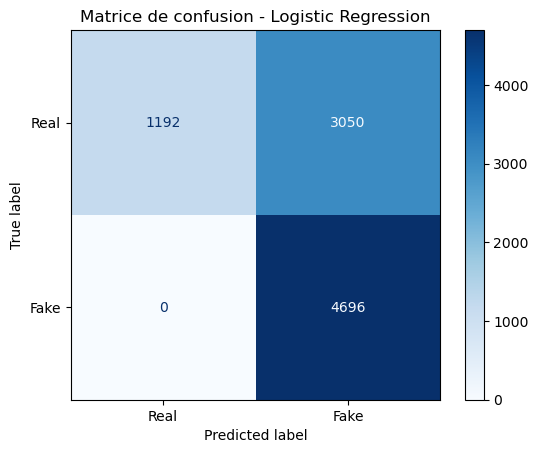

In [150]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels=['Real', 'Fake'])
disp.plot(cmap= 'Blues')
plt.title("Matrice de confusion - Logistic Regression")
plt.show()

In [152]:
#Naive Bayes

In [158]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [164]:
y_pred_nb = nb_model.predict(X_test_tfidf)

In [168]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Accuracy: 0.6632356231819199


In [172]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45      4242
           1       0.61      1.00      0.76      4696

    accuracy                           0.66      8938
   macro avg       0.80      0.65      0.60      8938
weighted avg       0.79      0.66      0.61      8938



In [186]:
#Comparaison des performances

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
results = {
    "Model": ['Logisstic Regression', 'Naive Bayes'],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_nb)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_nb)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_nb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_nb)
    ]
}
results_df = pd.DataFrame(results) 
print(results_df)   

                  Model  Accuracy  Precision  Recall  F1 Score
0  Logisstic Regression  0.658760   0.606248     1.0  0.754863
1           Naive Bayes  0.663236   0.609395     1.0  0.757297


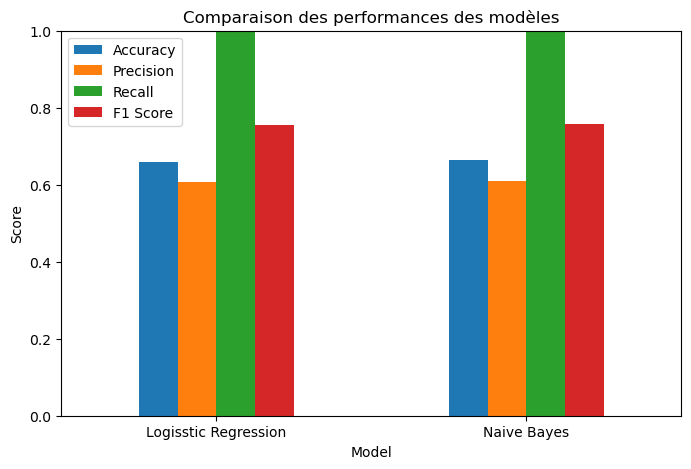

In [202]:
results_df.plot(x="Model", kind="bar", figsize=(8, 5))
plt.title("Comparaison des performances des modèles")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

In [204]:
import joblib

joblib.dump(nb_model, "models1/fake_news_nb.pkl")
joblib.dump(tfidf, "models1/tfidf_vectorizer.pkl")

print("Modèle et vectorizer sauvegardés avec succès !")


Modèle et vectorizer sauvegardés avec succès !
